In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
df1=pd.read_csv('IMDB Dataset.csv')

In [3]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# One review
df1['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Step 1

# Text Cleaning
* Sample 10000 rows
* Remove html tags
* Remove special characters
* Converting every thing to lower case
* Removing Stop words
* Stemming

In [8]:
df=df1.sample(10000)

In [9]:
df.shape

(10000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 22186 to 37654
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


In [11]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True) #converting sentiments to numerical col

In [12]:
df.head()

,review,sentiment
22186,I saw this in a sneak two days before the offi...,0
4999,This was a big disappointment for me. I think ...,0
36235,"In my opinion, the ending is what completely r...",0
20654,"There are two things that I like about Elvira,...",1
47943,Amanda Bynes is an enormously talented actress...,0


In [13]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].review)

'In my opinion, the ending is what completely ruined the whole thing. The initial idea of having someone suddenly realize they were the son of god and the second coming was somewhat clever. People started to believe him and his friends became the new disciples. People went nutty, demons were possessing people, all kinds of fun. Of course then it all went wrong. It was bad enough that they had to take on the impossible task of looking through a vast amount of writings to find the "third testament" in five days, but then at the end it became this ridiculous humanist fantasy. I won\'t spoil it, but I\'ll just say it comes off as if it were written by a teenager with a very limited knowledge of theology. I hear they are making an American feature version of this story, I just hope they change the eye rolling ending.'

In [14]:
# Function to clean html tags

def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [15]:
df['review']=df['review'].apply(clean_html)

In [16]:
# converting everything to lower

def convert_lower(text):
    return text.lower()

In [17]:
df['review']=df['review'].apply(convert_lower)

In [18]:
# function to remove special characters

def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x + ' '
    return x

**Example**

In [19]:
remove_special(' th%e @ classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare. forget pretty pictures painted for mainstream audiences, f')

' th e   classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare  forget pretty pictures painted for mainstream audiences  f'

In [20]:
df['review']=df['review'].apply(remove_special)

In [21]:
# Remove the stop words
import nltk

In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
df

,review,sentiment
22186,i saw this in a sneak two days before the offi...,0
4999,this was a big disappointment for me i think ...,0
36235,in my opinion the ending is what completely r...,0
20654,there are two things that i like about elvira ...,1
47943,amanda bynes is an enormously talented actress...,0
...,...,...
29227,having just seen this i find it hard to belie...,1
32378,this is only somewhat attractive for fans of ...,0
2645,from the offset i knew this was going to be a...,1
16616,some of the acknowledged altman masterpieces ...,1


In [22]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [23]:
df['review']=df['review'].apply(remove_stopwords)

In [24]:
df

,review,sentiment
38414,"[notion, marital, fidelity, portrayed, film, s...",1
2932,"[oh, dear, horrid, movie, production, cheap, n...",0
7421,"[really, great, film, full, love, humor, compe...",1
18685,"[splendid, film, eight, minutes, displays, unu...",1
41935,"[goodbye, mr, chips, superbly, written, photog...",1
...,...,...
40232,"[rookie, suffers, much, random, musical, songs...",0
32872,"[show, freaking, hilarious, jokes, original, g...",1
48064,"[movie, fun, board, essentially, follows, come...",1
28256,"[matrix, appeared, 1999, questioned, existence...",1


In [25]:
# Perform stemming

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [26]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
        

In [27]:
stem_words(['I','loved','loving','it'])

['I', 'love', 'love', 'it']

In [28]:

df['review']=df['review'].apply(stem_words)
df

,review,sentiment
38414,"[notion, marit, fidel, portray, film, seem, ou...",1
2932,"[oh, dear, horrid, movi, product, cheap, nasti...",0
7421,"[realli, great, film, full, love, humor, compe...",1
18685,"[splendid, film, eight, minut, display, unusu,...",1
41935,"[goodby, mr, chip, superbl, written, photograp...",1
...,...,...
40232,"[rooki, suffer, much, random, music, song, int...",0
32872,"[show, freak, hilari, joke, origin, god, love,...",1
48064,"[movi, fun, board, essenti, follow, comed, rom...",1
28256,"[matrix, appear, 1999, question, exist, ident,...",1


In [29]:
# Join back

def join_back(list_input):
    return " ".join(list_input)
    

In [30]:
df['review']=df['review'].apply(join_back)

In [31]:
df

,review,sentiment
38414,notion marit fidel portray film seem outdat to...,1
2932,oh dear horrid movi product cheap nasti rememb...,0
7421,realli great film full love humor compel audie...,1
18685,splendid film eight minut display unusu genr m...,1
41935,goodby mr chip superbl written photograph musi...,1
...,...,...
40232,rooki suffer much random music song interspers...,0
32872,show freak hilari joke origin god love eric ke...,1
48064,movi fun board essenti follow comed romp two g...,1
28256,matrix appear 1999 question exist ident expect...,1


In [32]:
df['review']

38414    notion marit fidel portray film seem outdat to...
2932     oh dear horrid movi product cheap nasti rememb...
7421     realli great film full love humor compel audie...
18685    splendid film eight minut display unusu genr m...
41935    goodby mr chip superbl written photograph musi...
                               ...                        
40232    rooki suffer much random music song interspers...
32872    show freak hilari joke origin god love eric ke...
48064    movi fun board essenti follow comed romp two g...
28256    matrix appear 1999 question exist ident expect...
45592    spoilerstom jerri classic cartoon flawless ide...
Name: review, Length: 10000, dtype: object

In [33]:
X=df.iloc[:,0:1].values

In [34]:
X.shape

(10000, 1)

# step 2

# vectorize(Bagging of words BOW)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()#(max_features=1000)

In [36]:
X=cv.fit_transform(df['review']).toarray()

In [37]:
X.shape

(10000, 36287)

In [38]:
X[0].max()

4

In [39]:
X[0].mean()

0.0026180174718218644

In [40]:
y=df.iloc[:,-1].values

In [41]:
y.shape

(10000,)

# step 3

# putting into algorithm 

In [42]:
# X,y
# Training set
# Test Set(Already know the result)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [44]:
X_train.shape

(8000, 36287)

In [45]:
X_test.shape

(2000, 36287)

In [46]:
y_train.shape

(8000,)

In [47]:
y_test.shape

(2000,)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [49]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

# Training model

In [50]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Predictions

In [51]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [52]:
y_test.shape

(2000,)

In [53]:
y_pred1.shape

(2000,)

In [54]:
from sklearn.metrics import accuracy_score

# Checking aacuracy

In [55]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.613
Multinomial 0.838
Bernaulli 0.814


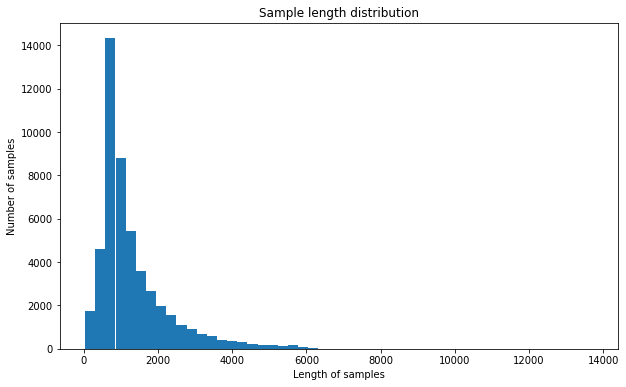

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(df1['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

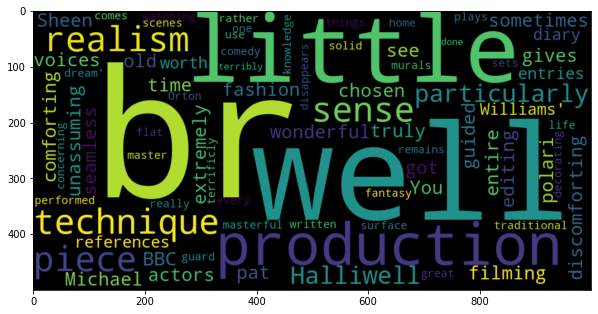

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
from wordcloud import WordCloud
norm_train_reviews=df1.review[:10000]
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

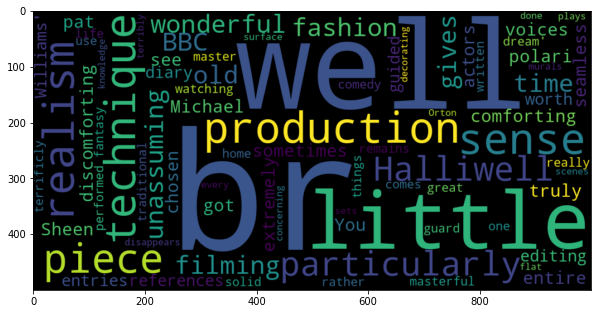

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
from wordcloud import WordCloud
norm_train_reviews=df1.review[:5000]
negative_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show